<a href="https://colab.research.google.com/github/norayehia/segment_the_nuclei/blob/main/segment_the_nuclei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1. **Install necessary libraries**:
     - The scenario starts by installing the required libraries using pip, such as StarDist and scikit-image. These libraries provide the tools needed to load images and perform segmentation operations.

2. **Import necessary libraries**:
     - Necessary libraries are imported into the scenario, including os, numpy, and matplotlib.pyplot. This also includes importing a StarDist2D model to perform the segmentation.

3. **Specify the image folder path**:
     - The path containing the images from which you want to segment the kernels is selected.

4. **Upload images**:
     - os.listdir() is used to get a list of file names in the folder, and then io.imread() is used to load images into the image list.

5. **Split cores using StarDist**:
     - The pre-trained StarDist2D model is used to perform the segmentation. This step is performed using model.predict_instances() for each image.

6. **Visualize and save split images**:
     - Original and segmented images are visualized to evaluate the results. The segmented images are then saved in the specified output folder.

7. **Export ImageJ segmentation masks (optional) **:
     The resulting segmentation mask can be exported for further analysis using ImageJ software.



In [ ]:
# Step 1: Install required libraries
!pip install stardist scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 22.2 MB/s eta 0:00:00


THENRESTARTsession

In [ ]:
# Step 2: Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from stardist.models import StarDist2D
from stardist import export_imagej_rois

In [ ]:

# Step 3: Define the path to the directory containing your images
img_dir = '/content/drive/MyDrive/help/hiring/original'

In [ ]:
# Step 4: Load images
image_files = os.listdir(img_dir)
images = [io.imread(os.path.join(img_dir, img_file)) for img_file in image_files]

In [ ]:

# Step 5: Segment nuclei using StarDist
model = StarDist2D.from_pretrained('2D_versatile_fluo')
segmented_images = [model.predict_instances(img) for img in images]




Found model '2D_versatile_fluo' for 'StarDist2D'.
5320433/5320433 [==============================] - 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


base.py (406): Predicting on non-float input... ( forgot to normalize? )


check shape of imgs

In [ ]:
for img in images:
  print(img.shape)

(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)
(720, 960)


In [ ]:
# Step 6: Visualize and save segmented images
output_dir = '/content/drive/MyDrive/help/hiring/segmentation/segmented'
os.makedirs(output_dir, exist_ok=True)

The code you provided aims to visualize the original image alongside its segmented version using the mark_boundaries function from the scikit-image library. This function overlays the segmentation boundaries onto the original image, providing a visual representation of the segmentation results.

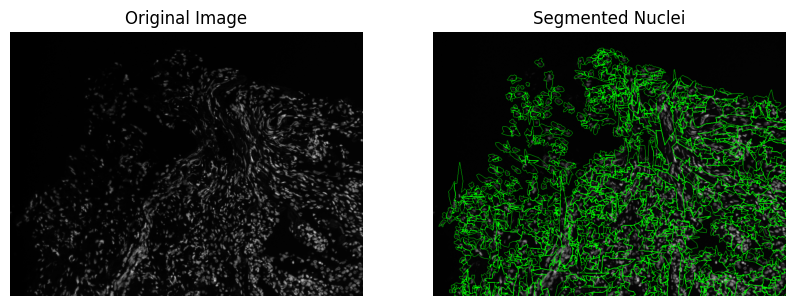

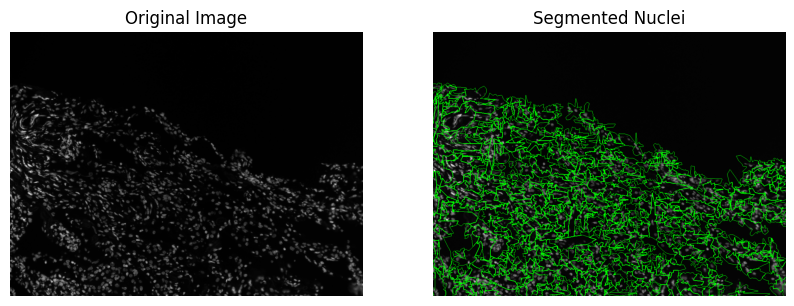

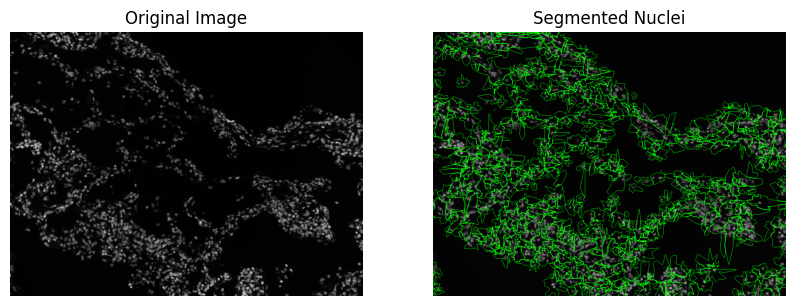

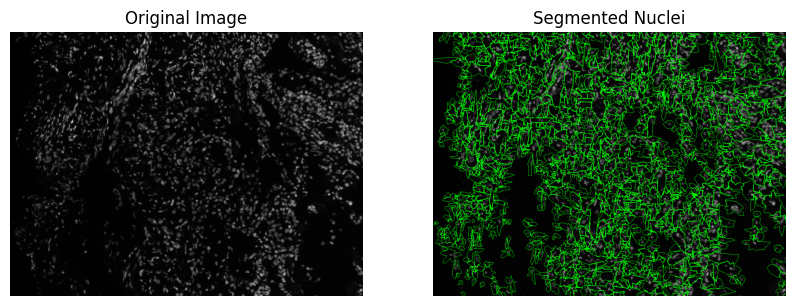

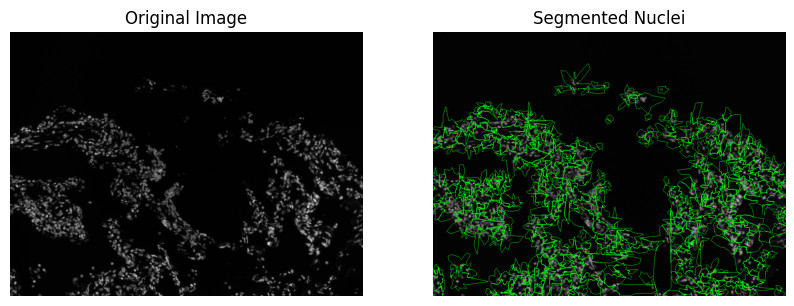

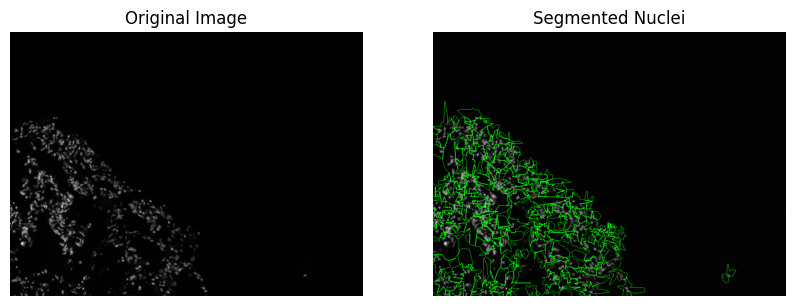

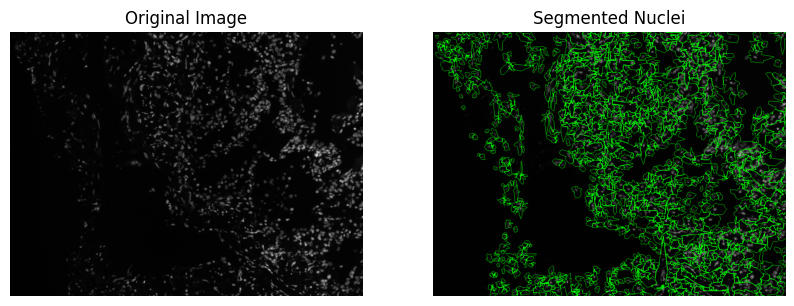

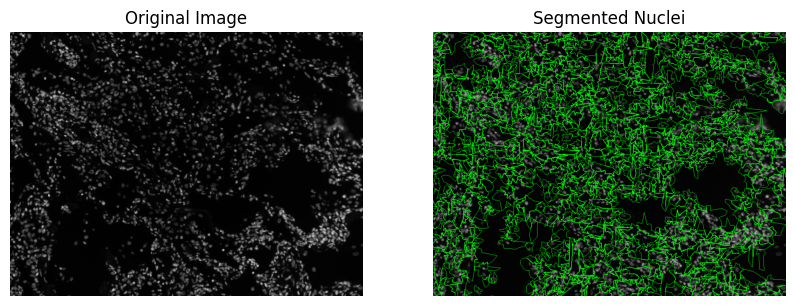

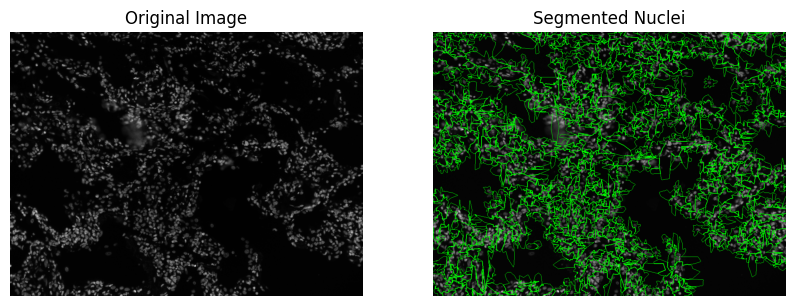

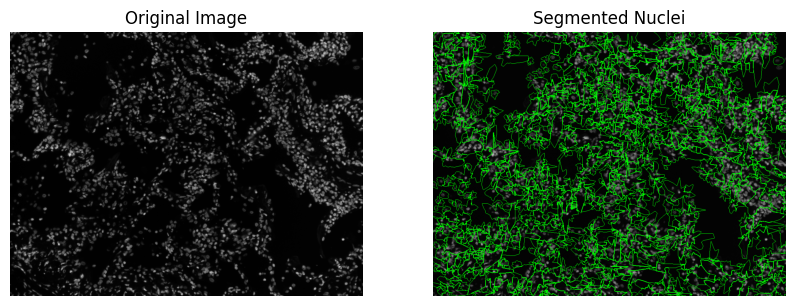

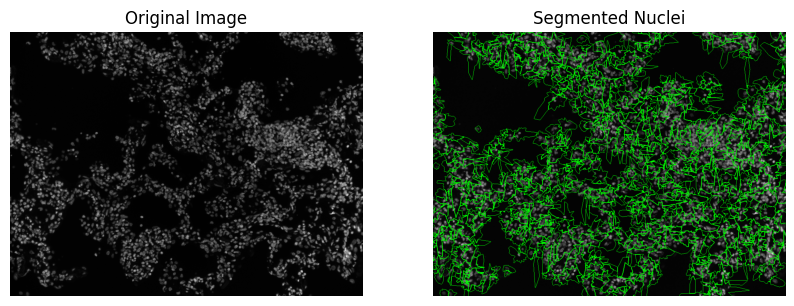

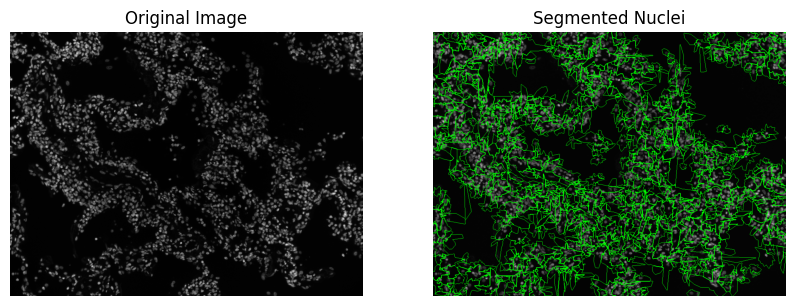

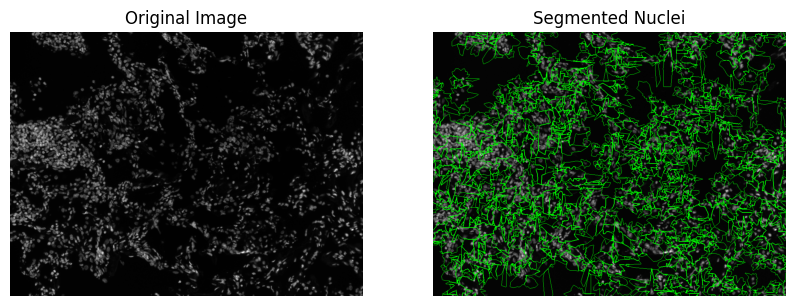

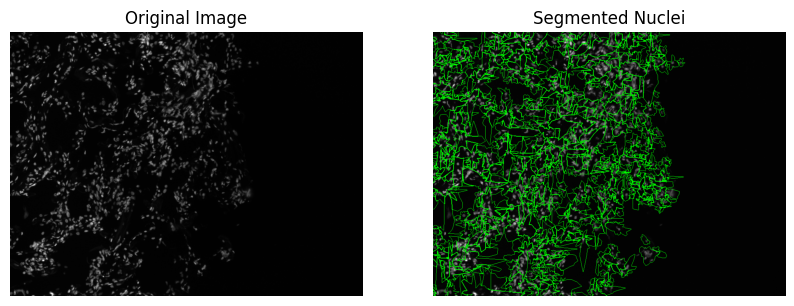

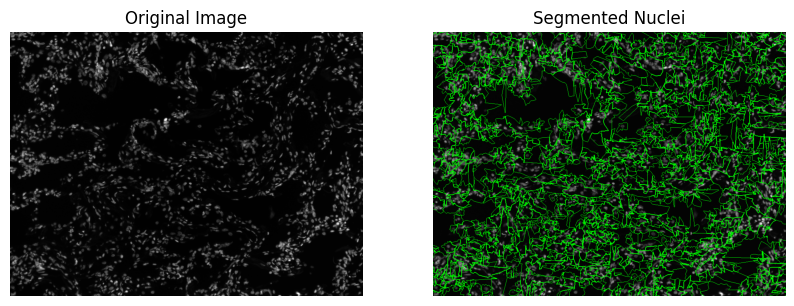

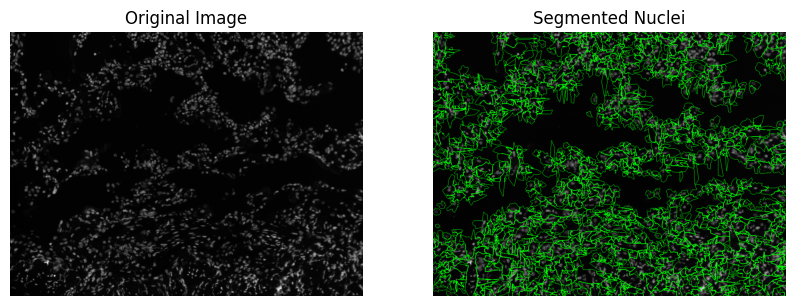

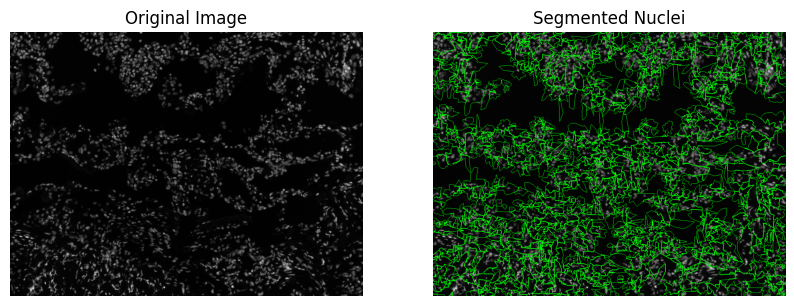

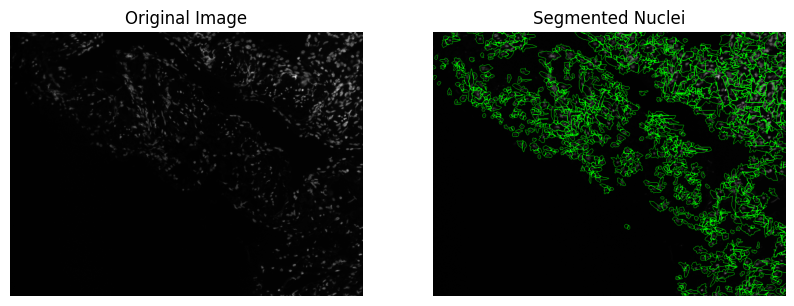

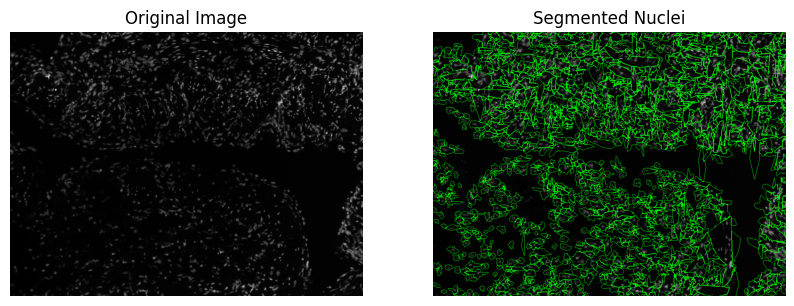

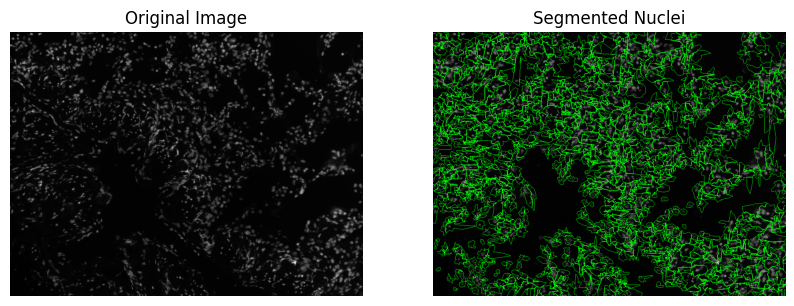

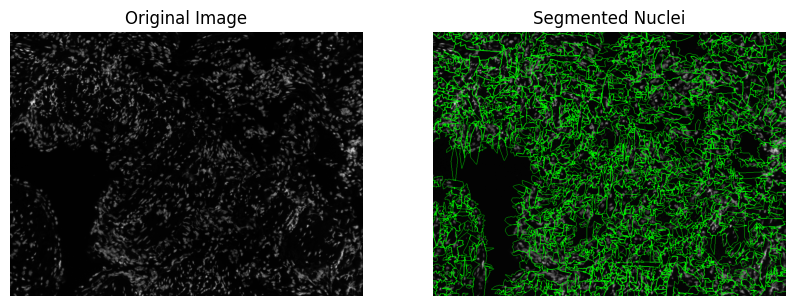

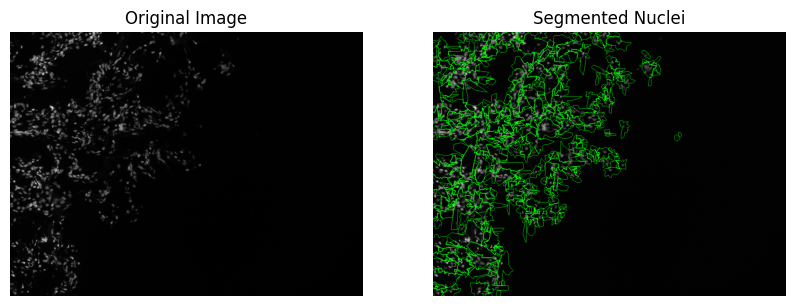

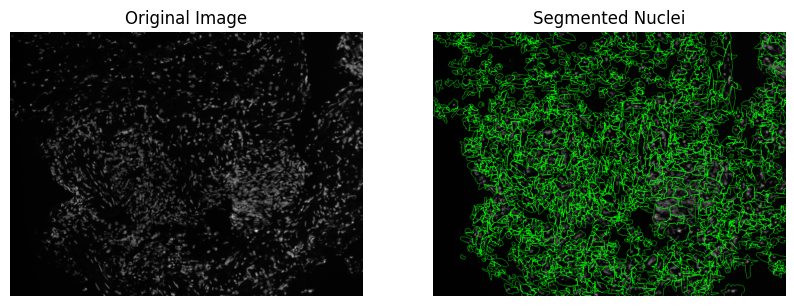

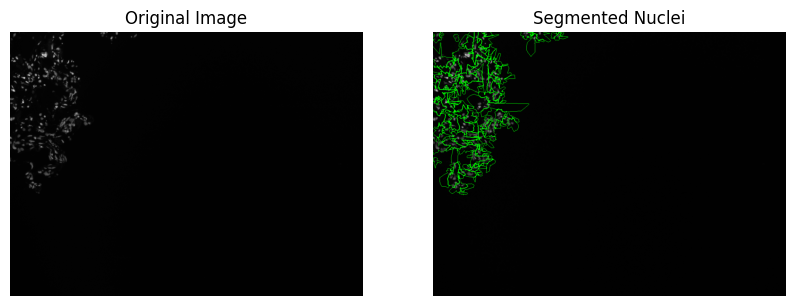

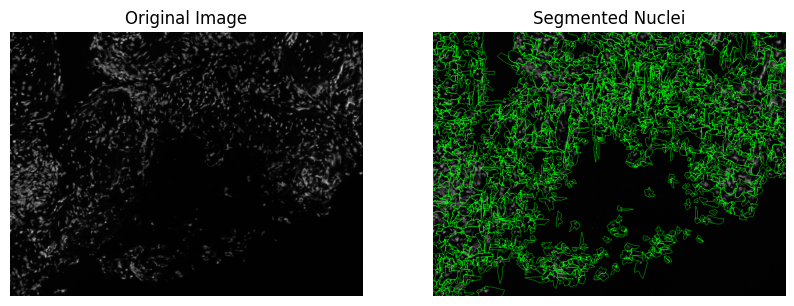

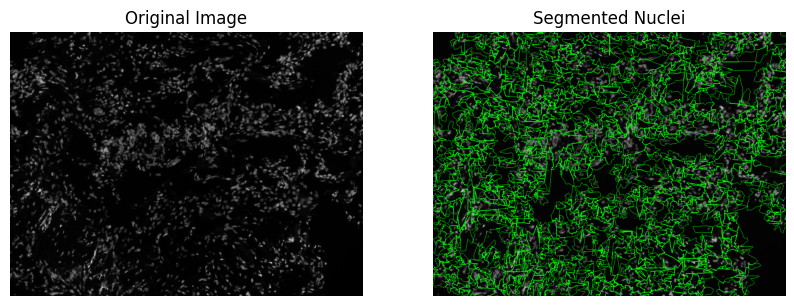

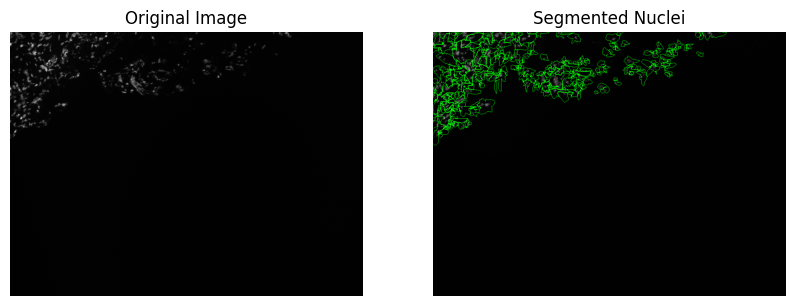

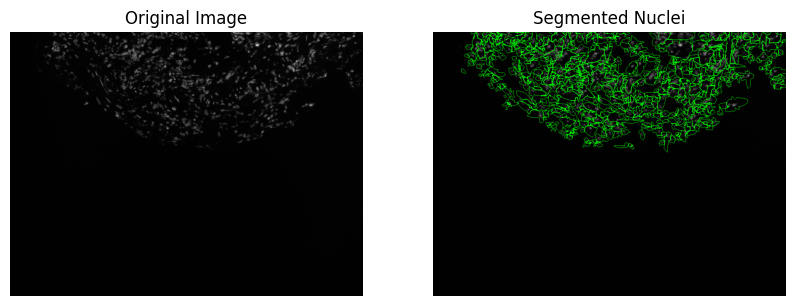

In [ ]:
from skimage.segmentation import mark_boundaries

for img, seg_img, img_file in zip(images, segmented_images, image_files):
    # Check if seg_img is a tuple and take the first element
    if isinstance(seg_img, tuple):
        seg_img = seg_img[0]

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(mark_boundaries(img, seg_img, color=(0, 1, 0)))
    ax[1].set_title('Segmented Nuclei')
    ax[1].axis('off')

    plt.savefig(os.path.join(output_dir, f'segmented_{img_file}'))
    plt.show()
